# Drug Consumption

## Data Understanding
### Import von benötigten Bibliotheken

In [109]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Datensatz abrufen

In [110]:
dataset = fetch_ucirepo(id=373)

### Daten (Features und Zielvariable)

In [111]:
X = dataset.data.features
X = X.drop(columns=['age', 'gender', 'ethnicity'])
y = dataset.data.targets

### Erste Übersicht der Features und der Zielvariablen

In [112]:
print("Übersicht der Merkmale:")
print(X.head())

Übersicht der Merkmale:
   education  country   nscore   escore   oscore   ascore   cscore  impuslive  \
0   -0.05921  0.96082  0.31287 -0.57545 -0.58331 -0.91699 -0.00665   -0.21712   
1    1.98437  0.96082 -0.67825  1.93886  1.43533  0.76096 -0.14277   -0.71126   
2   -0.05921  0.96082 -0.46725  0.80523 -0.84732 -1.62090 -1.01450   -1.37983   
3    1.16365  0.96082 -0.14882 -0.80615 -0.01928  0.59042  0.58489   -1.37983   
4    1.98437  0.96082  0.73545 -1.63340 -0.45174 -0.30172  1.30612   -0.21712   

        ss  
0 -1.18084  
1 -0.21575  
2  0.40148  
3 -1.18084  
4 -0.21575  


### Lage- und Streuungsmaße

In [113]:
print("Lage- und Streuungsmaße der Features:")
print(X.describe())

Lage- und Streuungsmaße der Features:
         education      country       nscore       escore       oscore  \
count  1885.000000  1885.000000  1885.000000  1885.000000  1885.000000   
mean     -0.003806     0.355542     0.000047    -0.000163    -0.000534   
std       0.950078     0.700335     0.998106     0.997448     0.996229   
min      -2.435910    -0.570090    -3.464360    -3.273930    -3.273930   
25%      -0.611130    -0.570090    -0.678250    -0.695090    -0.717270   
50%      -0.059210     0.960820     0.042570     0.003320    -0.019280   
75%       0.454680     0.960820     0.629670     0.637790     0.723300   
max       1.984370     0.960820     3.273930     3.273930     2.901610   

            ascore       cscore    impuslive           ss  
count  1885.000000  1885.000000  1885.000000  1885.000000  
mean     -0.000245    -0.000386     0.007216    -0.003292  
std       0.997440     0.997523     0.954435     0.963701  
min      -3.464360    -3.464360    -2.555240    -2.0784

### Enthaltene Drogen im Datensatz

In [114]:
drug_columns = ['cannabis', 'coke', 'ecstasy', 'heroin', 'meth', 'mushrooms', 'nicotine', 'lsd', 'amphet', 'crack', 'alcohol']

### Primäre Auswahl an zu analysierenden Drogen

In [115]:
chosen_drugs = ['cannabis', 'coke', 'nicotine'] 

### Visualisierung der Verteilung des Konsums für jede Droge

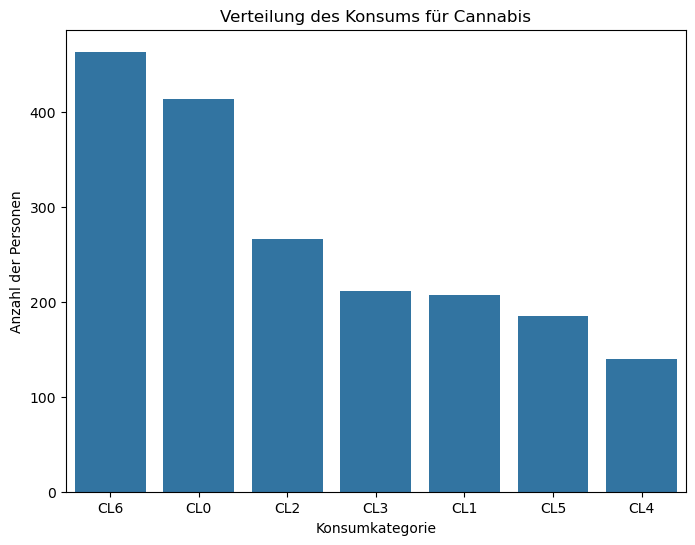

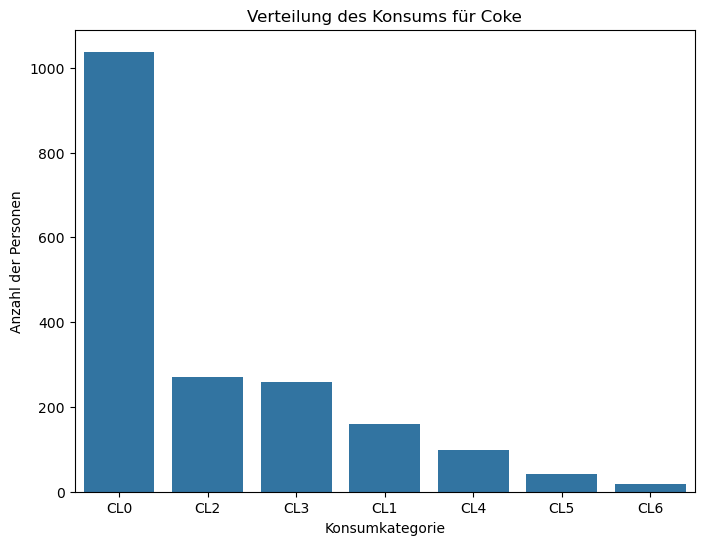

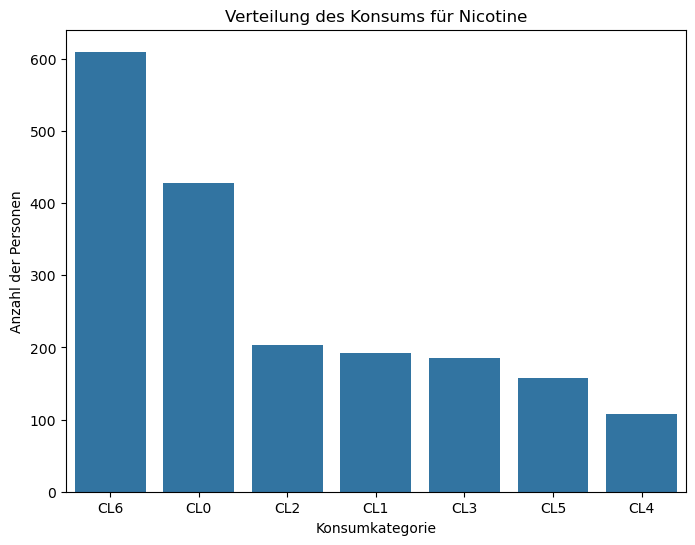

In [116]:
for drug in chosen_drugs:
    plt.figure(figsize=(8, 6))
    
    value_counts = y[drug].value_counts().sort_values(ascending=False)
    
    sns.countplot(x=y[drug], order=value_counts.index)
    
    plt.title(f"Verteilung des Konsums für {drug.capitalize()}")
    plt.xlabel('Konsumkategorie')
    plt.ylabel('Anzahl der Personen')
    plt.show()


### Funktion, die Modelle erstellt und evaluiert

--> Zielvariable für die gewählte Droge

In [117]:
drug_name = "cannabis"
y_selected = y[drug_name]

### Train-Test-Split

--> Splitting zu 80% Trainingsdaten und 20% Testdaten

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y_selected, test_size=0.2, random_state=42)

### Verifizieren des Splits

In [119]:
print("\nTrainingsdaten (Features) : ", X_train.shape)
print("Testdaten (Features) : ", X_test.shape)



Trainingsdaten (Features) :  (1508, 9)
Testdaten (Features) :  (377, 9)


## Erstellen und Trainieren verschiedener Modelle
### Random Forest Modell

In [120]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


### Logistische Regression Modell


In [121]:
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

### K-Nearest Neighbors Modell

In [122]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

### SVM Modell

In [123]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

### Ergebnisse für alle Modelle

In [124]:
models = ['Random Forest', 'Logistische Regression', 'K-Nearest Neighbors', "SVM"]
accuracies = [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_logreg),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_svm)
    ]
classification_reports = [
        classification_report(y_test, y_pred_rf, zero_division=0),
        classification_report(y_test, y_pred_logreg, zero_division=0),
        classification_report(y_test, y_pred_knn, zero_division=0),
        classification_report(y_test, y_pred_svm, zero_division=0)
    ]
f1_scores = [
    f1_score(y_test, y_pred_rf, average='macro'),
    f1_score(y_test, y_pred_logreg, average='macro'),
    f1_score(y_test, y_pred_knn, average='macro'),
    f1_score(y_test, y_pred_svm, average='macro')
]

### Ausgabe der Genauigkeit und Klassifikationsberichte

In [125]:
for i in range(len(models)):
    print(f"\n{models[i]} - Genauigkeit: {accuracies[i]:.4f}")
    print(f"\n{models[i]} - F1-Score: {f1_scores[i]:.4f}") 
    print(f"\n{models[i]} - Klassifikationsbericht:")
    print(classification_reports[i])


Random Forest - Genauigkeit: 0.3899

Random Forest - F1-Score: 0.2578

Random Forest - Klassifikationsbericht:
              precision    recall  f1-score   support

         CL0       0.47      0.67      0.56        86
         CL1       0.30      0.32      0.31        28
         CL2       0.14      0.09      0.11        55
         CL3       0.23      0.05      0.09        57
         CL4       0.14      0.04      0.06        27
         CL5       0.25      0.09      0.14        32
         CL6       0.44      0.74      0.55        92

    accuracy                           0.39       377
   macro avg       0.28      0.29      0.26       377
weighted avg       0.32      0.39      0.33       377


Logistische Regression - Genauigkeit: 0.4297

Logistische Regression - F1-Score: 0.2188

Logistische Regression - Klassifikationsbericht:
              precision    recall  f1-score   support

         CL0       0.47      0.83      0.60        86
         CL1       0.20      0.07      0.11

### Vergleich der Genauigkeiten

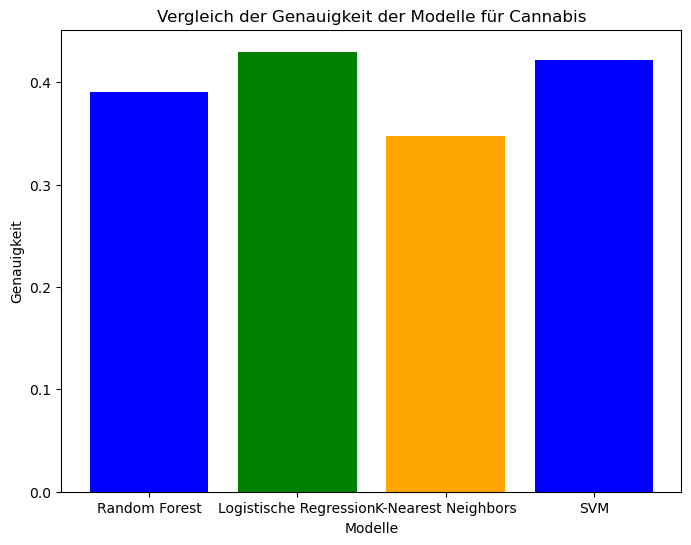

In [126]:
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Modelle')
plt.ylabel('Genauigkeit')
plt.title(f'Vergleich der Genauigkeit der Modelle für {drug_name.capitalize()}')
plt.show()

Anzahl der Merkmale (9) und Gewichtungen (63) stimmt nicht überein!
Anzahl der Merkmale (9) und Gewichtungen (189) stimmt nicht überein!


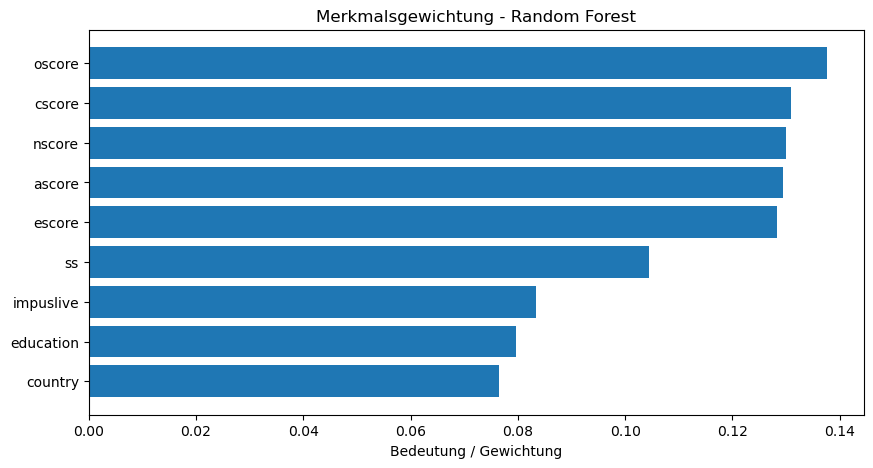

hinweis für inference: es wurden zu beginn features gedroppt


In [133]:
num_features = X_train.shape[1]
feature_names = X_train.columns.tolist() if hasattr(X_train, "columns") else [f"Merkmal {i}" for i in range(num_features)]

def zeige_feature_importance(modellname, gewichtungen):
    gewichtungen = np.array(gewichtungen)

    if len(gewichtungen) != len(feature_names):  
        print(f"Anzahl der Merkmale ({len(feature_names)}) und Gewichtungen ({len(gewichtungen)}) stimmt nicht überein!")
        return  

    sortierte_indices = np.argsort(gewichtungen)
    plt.figure(figsize=(10, 5))
    plt.title(f"Merkmalsgewichtung - {modellname}")
    plt.barh(range(len(gewichtungen)), gewichtungen[sortierte_indices], align="center")
    plt.yticks(range(len(gewichtungen)), np.array(feature_names)[sortierte_indices])
    plt.xlabel("Bedeutung / Gewichtung")
    plt.show()

if hasattr(logreg_model, "coef_") and logreg_model.coef_.size > 0:
    zeige_feature_importance("Logistische Regression", np.ravel(logreg_model.coef_))

if hasattr(svm_model, "coef_") and svm_model.coef_.size > 0:
    zeige_feature_importance("SVM (Linear)", np.ravel(svm_model.coef_))

if hasattr(rf_model, "feature_importances_") and rf_model.feature_importances_.size > 0:
    zeige_feature_importance("Random Forest", rf_model.feature_importances_)

print("hinweis für inference: es wurden zu beginn features gedroppt")


### Konfusionsmatrix für jedes Modell

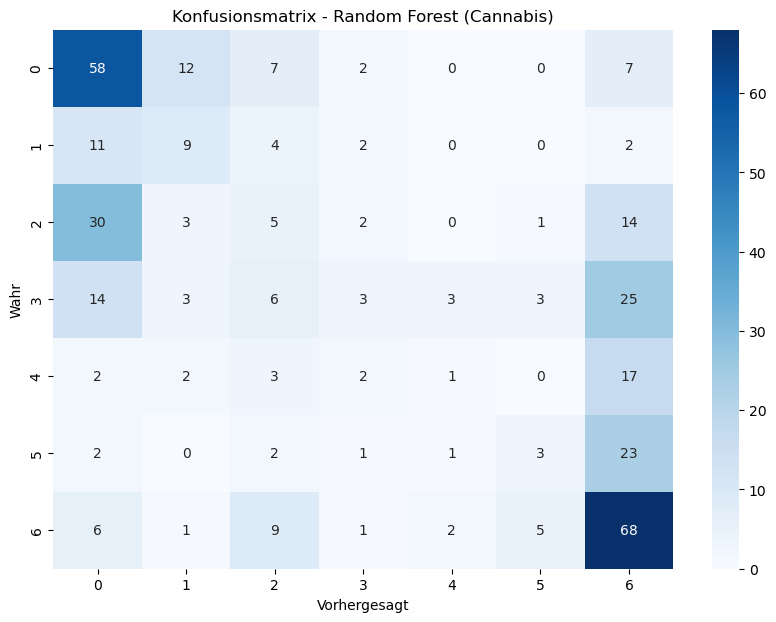

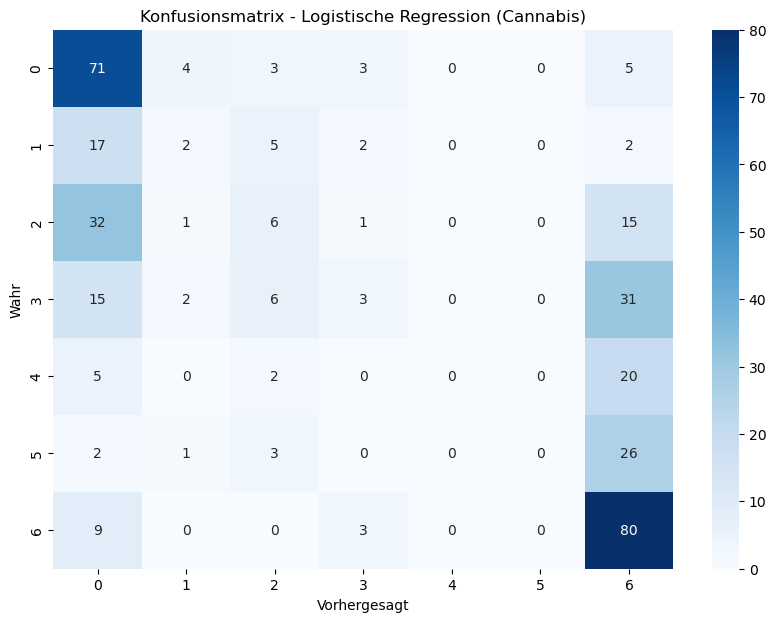

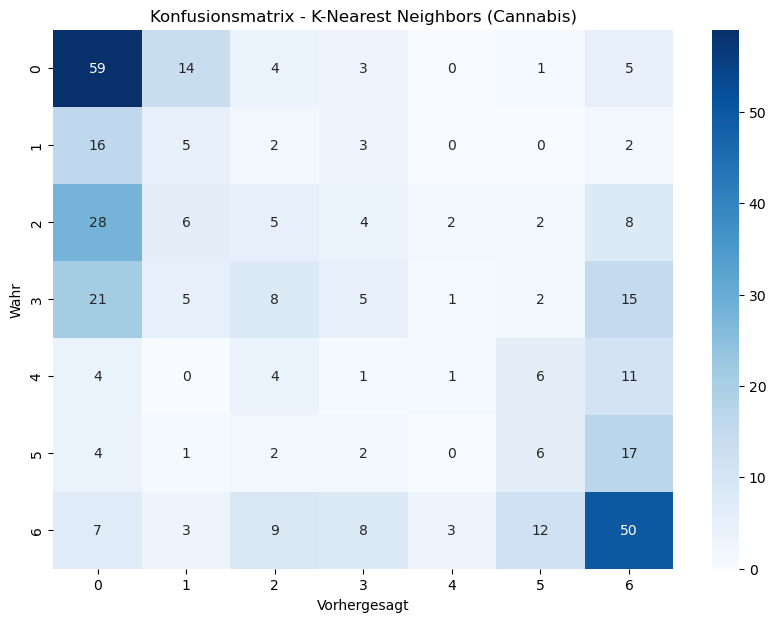

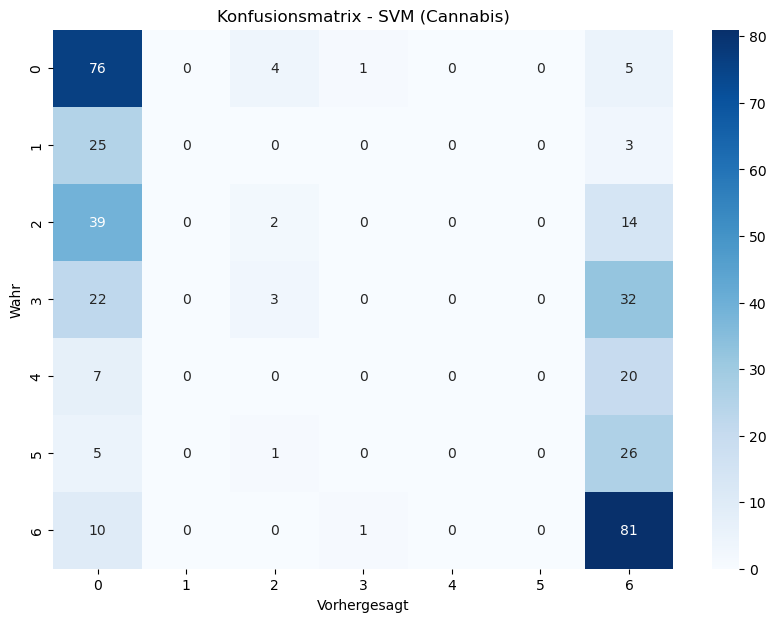

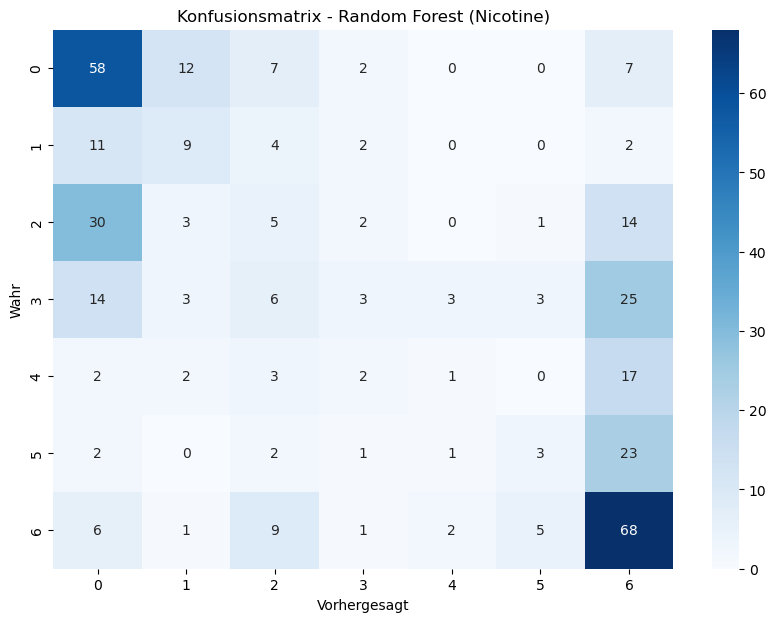

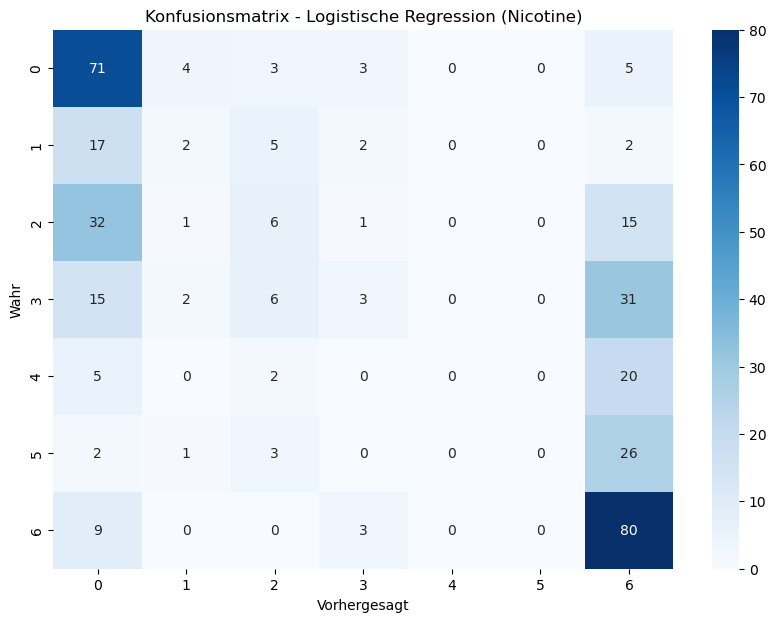

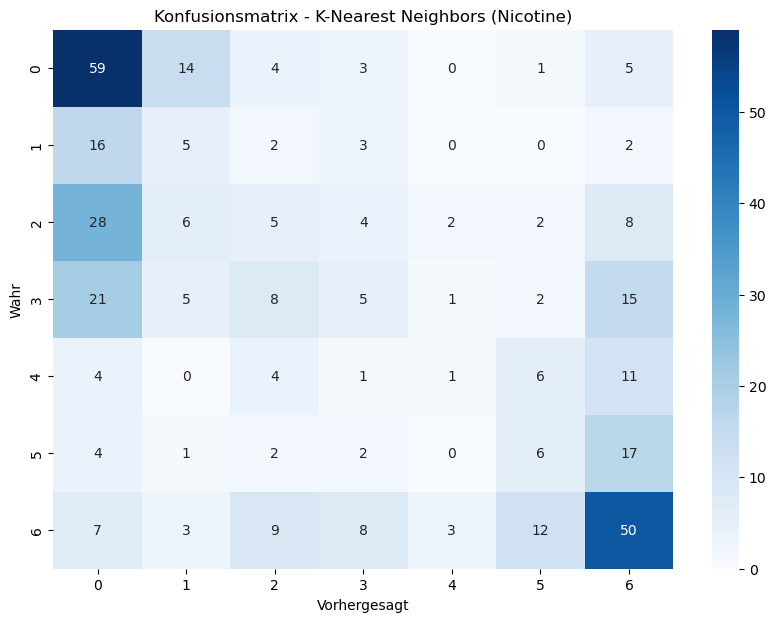

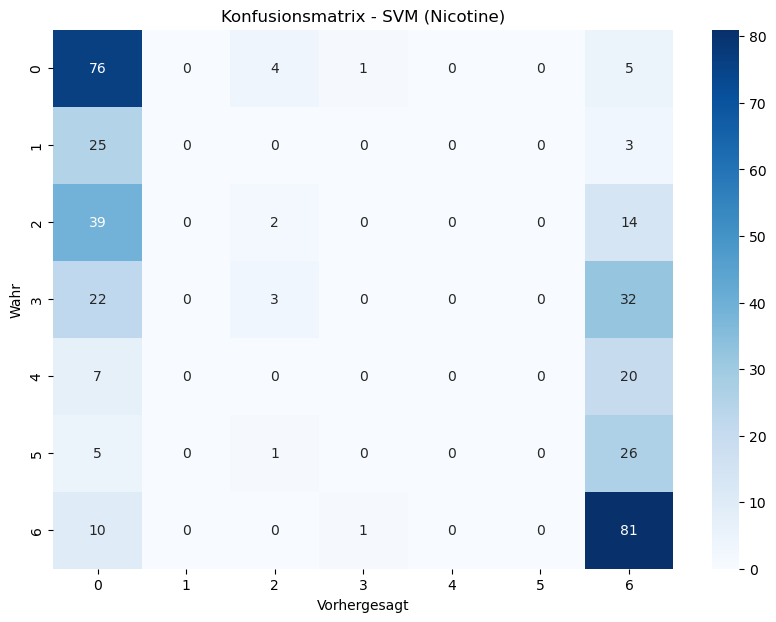

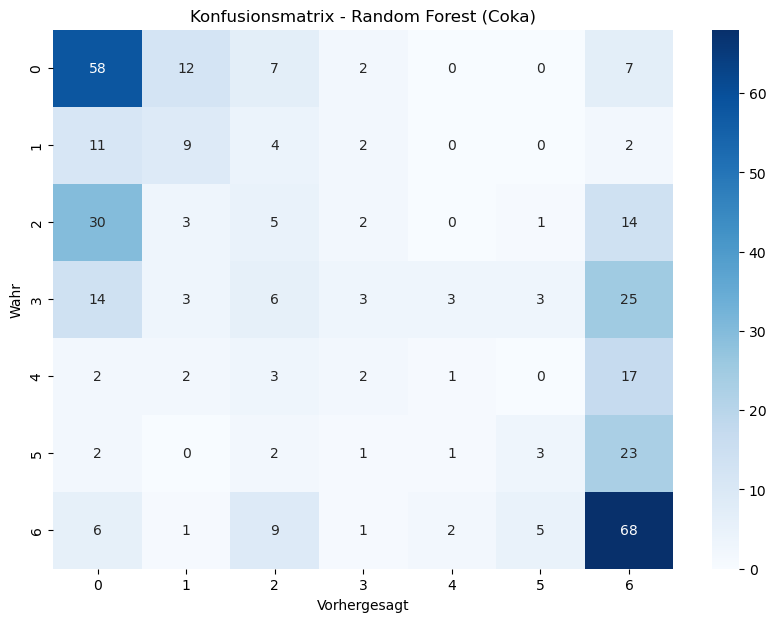

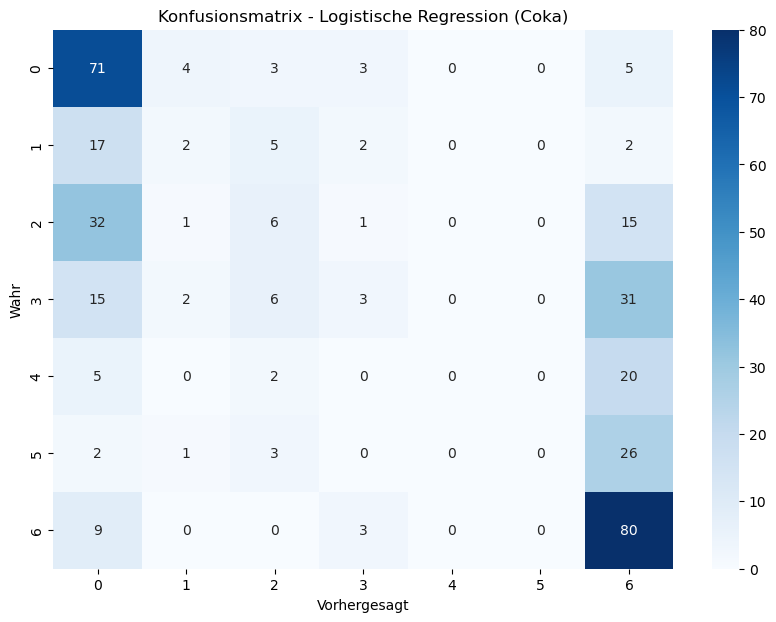

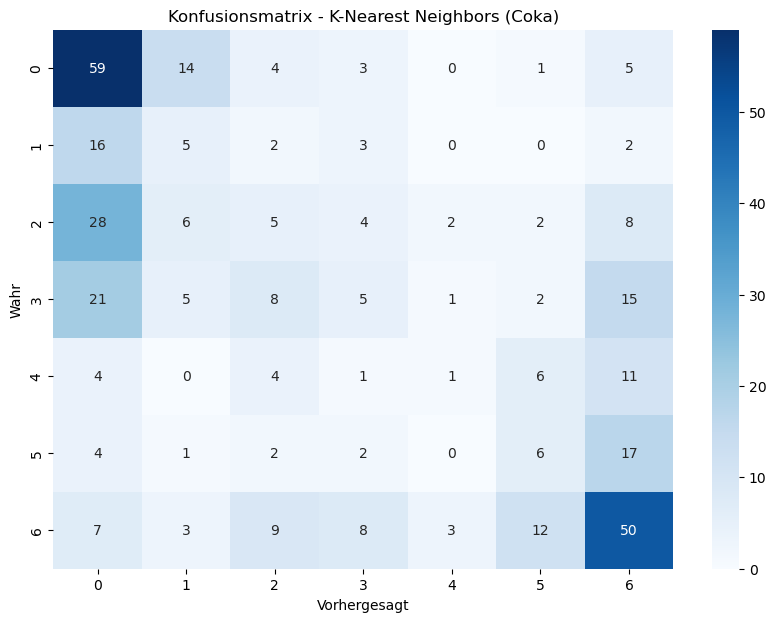

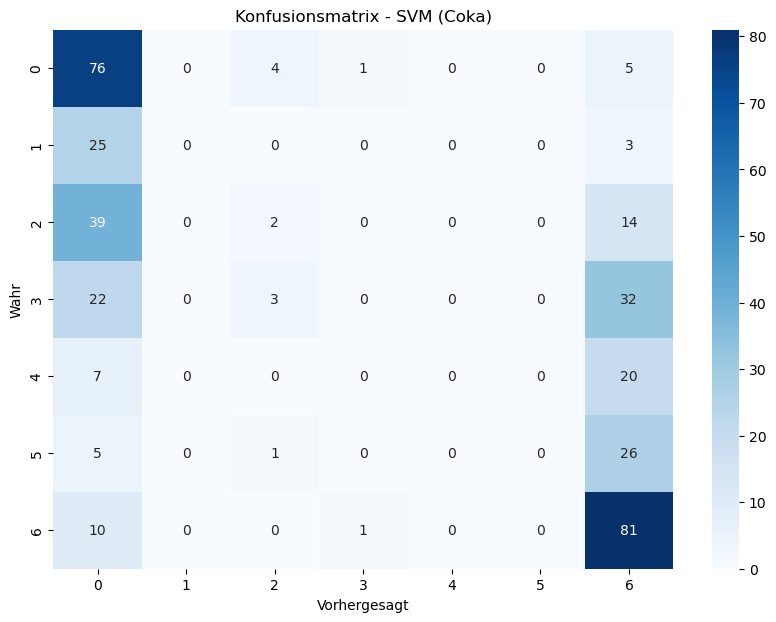

In [136]:
drug_names = ["Cannabis", "Nicotine", "Coka"]
models = ["Random Forest", "Logistische Regression", "K-Nearest Neighbors", "SVM"]
predictions = [y_pred_rf, y_pred_logreg, y_pred_knn, y_pred_svm]  # Alle Modellvorhersagen

for drug in drug_names:  
    for i in range(len(models)):  
        conf_matrix = confusion_matrix(y_test, predictions[i])

        plt.figure(figsize=(10, 7))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

        plt.title(f"Konfusionsmatrix - {models[i]} ({drug})")
        plt.xlabel("Vorhergesagt")
        plt.ylabel("Wahr")
        plt.show()



### Überprüfung der Klassen in den Vorhersagen

In [104]:
unique_classes = np.unique(y_test)
print("\nVorhergesagte Klassen:", np.unique(y_pred_rf))
print("Echte Klassen:", unique_classes)


Vorhergesagte Klassen: ['CL0' 'CL1' 'CL2' 'CL3' 'CL4' 'CL5' 'CL6']
Echte Klassen: ['CL0' 'CL1' 'CL2' 'CL3' 'CL4' 'CL5' 'CL6']


## Data Preparation

### Überprüfen auf Duplikate

In [105]:
print("Anzahl Duplikate im Datensatz: ", sum(X.duplicated()))

if sum(X.duplicated()) == 0: 
    print("Keine Duplikate im Datensatz.")

Anzahl Duplikate im Datensatz:  0
Keine Duplikate im Datensatz.


### Übersicht zu fehlenden Werten

In [106]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   education  1885 non-null   float64
 1   country    1885 non-null   float64
 2   nscore     1885 non-null   float64
 3   escore     1885 non-null   float64
 4   oscore     1885 non-null   float64
 5   ascore     1885 non-null   float64
 6   cscore     1885 non-null   float64
 7   impuslive  1885 non-null   float64
 8   ss         1885 non-null   float64
dtypes: float64(9)
memory usage: 132.7 KB
None


Keine fehlenden oder doppelten Werte im Datensatz vorhanden. Somit müssen keine Einträge gelöscht / entfernt werden.